In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [278]:
def plot_linear_learning(x, labels, w_hat, Js, error_rates):
    """
    Plot training curve, and visualize the decision boundry
    Args:
        x: (N, D) data array, non-augmented format
        labels:  lengnth array with labels 1, 2
        w_hat: final learned weights.
        Js: length N_epochs of Loss values (the learning curve)
        error_rates: length N_epochs of misclassification rates as the algorithm learned
    """
    N_epochs = len(Js)
    x_1 = x[labels==1]
    x_2 = x[labels==2]

    fig, ax = plt.subplots(1, 2, sharex=False, figsize=(12, 6))

    ## scatter plot with deciscion boundaries
    LIMIT = np.max(x)
    x_plot = np.arange(-1 * LIMIT, LIMIT, 0.01)
    ax[0].scatter(x_1.T[0], x_1.T[1], fc=(0, 0, 1, 0.5), label='class 1')
    ax[0].scatter(x_2.T[0], x_2.T[1], fc=(1, 0, 0, 0.5), label='class 2')
    #plot 2-class linear decision boundary
   
    ax[0].plot( x_plot, -1 * ( w_hat[1] *  x_plot  + w_hat[0] )
                                     / w_hat[2], linewidth=2, label='boundry')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    ax[0].set_xlim([-LIMIT, LIMIT])
    ax[0].set_ylim([-LIMIT, LIMIT])
    ax[0].legend()
    ax[0].grid(':')

    ## Learning curve
    epochs = np.arange(N_epochs)
    ax[1].plot(epochs, Js, marker='o', color='green', label='J (Loss)')
    # add second y-axis for the metric of error rate: https://pythonguides.com/matplotlib-two-y-axes/
    ax2 = ax[1].twinx() 
    ax2.plot(epochs, error_rates * 100, marker='x', color='purple', label='Error Rate')
    ax[1].set_ylabel('J (Loss)', color = 'green') 
    ax[1].tick_params(axis ='y', labelcolor = 'green') 
    ax2.set_ylabel('Error rate (%)', color = 'purple') 
    ax2.tick_params(axis ='y', labelcolor = 'purple') 

    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('J (Loss)')
    ax2.set_ylabel('error rate (%)')
    ax[0].legend()
    ax[1].grid(':')


In [279]:
def plot_linear_testing(x, labels, w_hat):
    """
    Visualize the decision boundary of testing sets
    Args:
    x: (N, D) data array, non-augmented format
    labels:  lengnth array with labels 1, 2
    w_hat: final learned weights as a numpy array.
    """
  
    x_1 = x[labels==1]
    x_2 = x[labels==2]

    fig, ax = plt.subplots(1, 2, sharex=False, figsize=(12, 6))

    ## scatter plot with deciscion boundaries
    
    LIMIT = np.max(x)

    
    x_plot = np.arange(-1 * LIMIT, LIMIT, 0.01)
    ax[0].scatter(x_1.T[0], x_1.T[1], fc=(0, 0, 1, 0.5), label='class 1')
    ax[0].scatter(x_2.T[0], x_2.T[1], fc=(1, 0, 0, 0.5), label='class 2')
    #plot 2-class linear decision boundary
    ax[0].plot( x_plot, -1 * ( w_hat[1] *  x_plot  + w_hat[0] ) 
                                    / w_hat[2], linewidth=2, label='boundry')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    ax[0].set_xlim([-LIMIT, LIMIT])
    ax[0].set_ylim([-LIMIT, LIMIT])
    ax[0].legend()
    ax[0].grid(':')


In [280]:
import numpy as np

def perceptron_learning(x, labels, w_int=np.array([1.0, 1.0, 1.0]), eta=1, max_iterations=1000):

    """
    Implements the batch gd perceptron learning algorithm.

    Args:
        x: (N, D) data array, non-augmented format.
        labels: Array of length N with labels 1, 2.
        w_int: Initial weights as a numpy array. Defaults to numpy.array([1.0,1.0,1.0]).
        eta: Learning rate as a float. Defaults to 1.
        max_iterations: Maximum number of iterations as an int. 
                        Defaults to 1000(here refer to epochs for batch gd).

    Returns:
        w_hats: Weights after each iteration.
                The array size should be (epochs, D+1) when augmented
        Js: Criterion function values after each iteration, size: (epochs, )
        error_rates: Misclassification rates after each iteration, size: (epochs, )
    """

    ########################
    # your code comes here
    ########################

    # Normalize labels to -1 and 1
    labels = np.where(labels == 1, -1, 1)
    
    # Initialize weights
    w = w_int.copy()
    
    # Initialize history of weights, criterion values, and error rates
    w_hats = [w.copy()]
    Js = []
    error_rates = []
    
    # Augment input data
    x_new = np.hstack((np.ones((x.shape[0], 1)), x))
    
    for i in range(max_iterations):
        output = np.dot(x_new, w)
        pred = np.sign(output)
        misclassified_points = (pred != labels)
        
        # Calculate error rate
        error_rate = np.mean(misclassified_points)
        error_rates.append(error_rate)
        
        # Calculate criterion function value using a formula taught in class
        J = -np.sum(output[misclassified_points] * labels[misclassified_points])

        Js.append(J)
        
        # Update weights using batch gradient descent
        if not np.any(misclassified_points):
            print(f"Convergence reached at epoch: { i + 1}")
            halt_condition = "Convergence"
            break
        
        gradient = - np.dot(x_new.T, labels * misclassified_points)
        w = w - eta * gradient
        w_hats.append(w.copy())
    else:
        halt_condition = "Maximum iterations reached without convergence."
        print(halt_condition)
        
    accuracy = 1 - error_rates[-1] 
    # Classification accuracy on the train set
    print("Classification accuracy on the train set = " , accuracy*100)
    print("Which halting condition was met = " , halt_condition)
    print("The weight values after halting = " , w)
    print("How many iterations were performed = ", i+1)
    
    return np.array(w_hats), np.array(Js), np.array(error_rates)



In [281]:
def perceptron_testing(x, labels, w_hat):

    '''
    Implements the perceptron testing.

    Args:
        x: (N, D) data array, non-augmented format.
        labels: Array of length N with labels 1, 2.
        w_hat: final learned weights as a numpy array.
    Returns:
        error_rates: Misclassification rates.
        
    '''
    ########################
    # your code comes here
    #######################
    
    x = np.hstack((np.ones((len(x), 1)), x))
    labels = np.where(labels == 1, -1, 1)
    pred = np.sign(np.dot(x, w_hat))

    misclassified = np.count_nonzero(pred != labels)
    error_rate = misclassified / len(labels)
    accuracy = 1 - error_rate

    print("Classification Accuracy : ", accuracy*100)
    print("Error rate on testiong dataset : ", error_rate*100)

    return error_rate

Convergence reached at epoch: 2
Classification accuracy on the train set =  100.0
Which halting condition was met =  Convergence
The weight values after halting =  [ -6.         -92.80248611 -99.73991823]
How many iterations were performed =  2


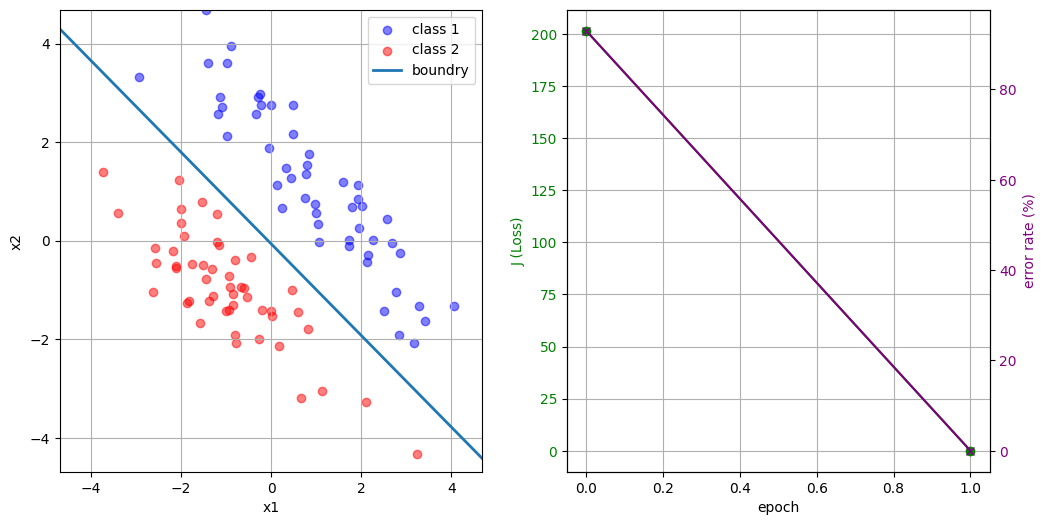

In [282]:
data = np.genfromtxt("dataset1_train.csv",
                    delimiter=",", dtype=float)
x = data[1:,0:2]
labels = data[1:,2]
# print("--------------start training----------------------")
w_hats, Js, error_rates = perceptron_learning(x, labels)
plot_linear_learning(x, labels, w_hats[-1], Js, error_rates)

In [283]:
w_hats[-1]

array([ -6.        , -92.80248611, -99.73991823])

In [284]:
w_hats

array([[  1.        ,   1.        ,   1.        ],
       [ -6.        , -92.80248611, -99.73991823]])

--------------start testing----------------------
Classification Accuracy :  100.0
Error rate on testiong dataset :  0.0


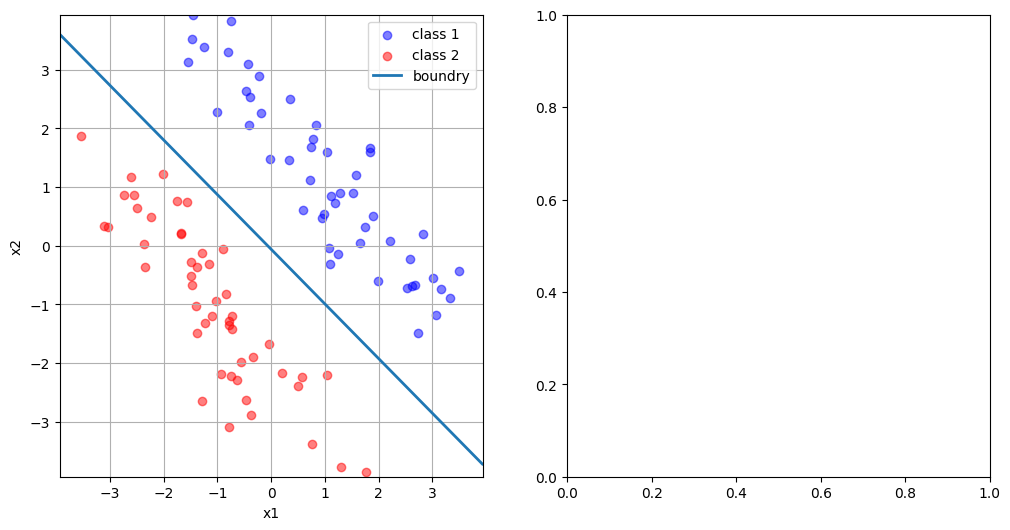

In [285]:
test_data = np.genfromtxt("dataset1_test.csv",
                    delimiter=",", dtype=float)
x = test_data[1:,0:2]
labels = test_data[1:,2]
print("--------------start testing----------------------")
#print(x, labels, w_hats[-1])
error_rate = perceptron_testing(x, labels, w_hats[-1])
plot_linear_testing(x, labels, w_hats[-1])
plt.show()

Convergence reached at epoch: 66
Classification accuracy on the train set =  100.0
Which halting condition was met =  Convergence
The weight values after halting =  [  16.            5.08575051 -229.46004326]
How many iterations were performed =  66


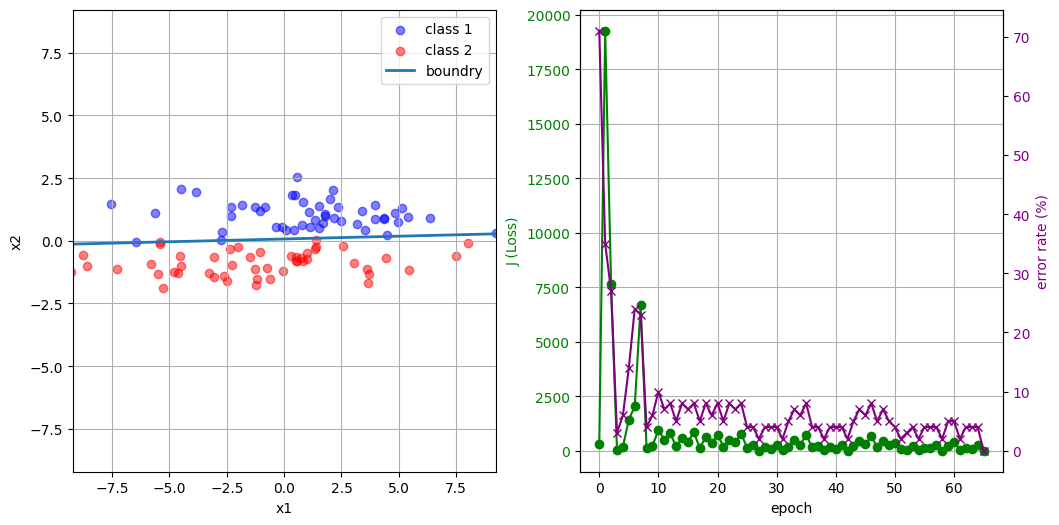

In [286]:
data = np.genfromtxt("dataset2_train.csv",
                    delimiter=",", dtype=float)
x = data[1:,0:2]
labels = data[1:,2]
# print("--------------start training----------------------")
w_hats, Js, error_rates = perceptron_learning(x, labels)
plot_linear_learning(x, labels, w_hats[-1], Js, error_rates)

--------------start testing----------------------
Classification Accuracy :  95.0
Error rate on testiong dataset :  5.0


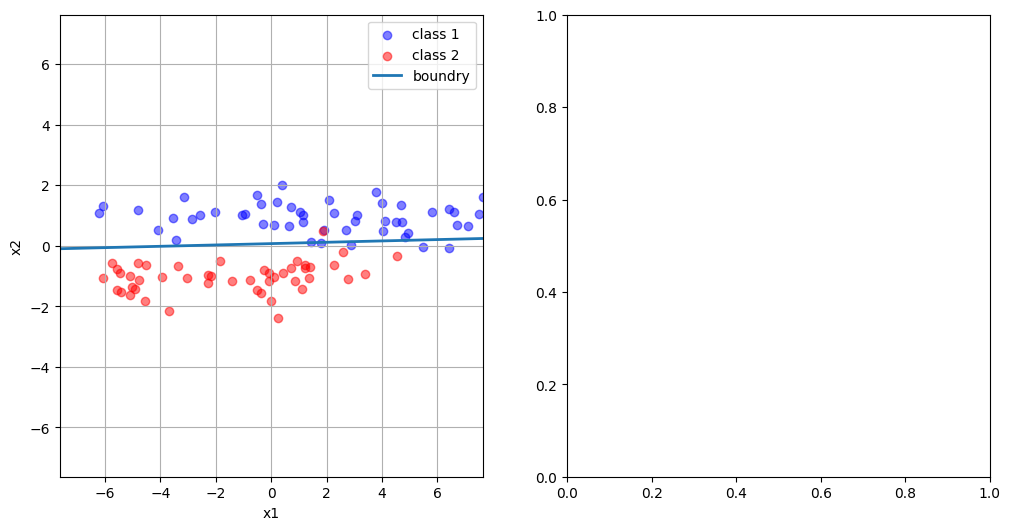

In [287]:
test_data = np.genfromtxt("dataset2_test.csv",
                    delimiter=",", dtype=float)
x = test_data[1:,0:2]
labels = test_data[1:,2]
print("--------------start testing----------------------")
#print(x, labels, w_hats[-1])
error_rate = perceptron_testing(x, labels, w_hats[-1])
plot_linear_testing(x, labels, w_hats[-1])
plt.show()

Maximum iterations reached without convergence.
Classification accuracy on the train set =  76.0
Which halting condition was met =  Maximum iterations reached without convergence.
The weight values after halting =  [ 82.         -28.61804405  -7.51658683]
How many iterations were performed =  1000


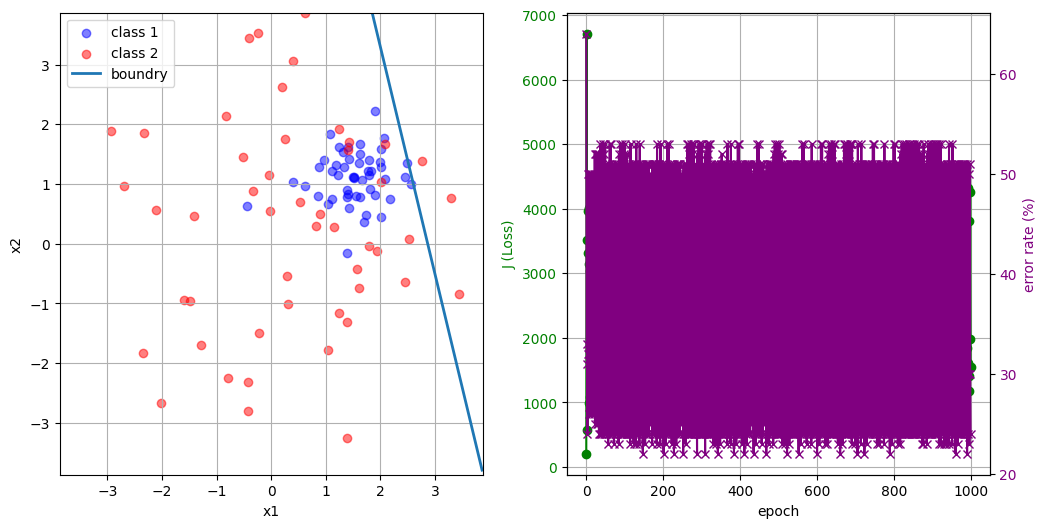

In [288]:
data = np.genfromtxt("dataset3_train.csv",
                    delimiter=",", dtype=float)
x = data[1:,0:2]
labels = data[1:,2]
# print("--------------start training----------------------")
w_hats, Js, error_rates = perceptron_learning(x, labels)
plot_linear_learning(x, labels, w_hats[-1], Js, error_rates)

In [289]:
w_hats

array([[  1.        ,   1.        ,   1.        ],
       [-35.        , -96.71880987, -72.02323372],
       [ -2.        , -60.71163366, -43.26226765],
       ...,
       [ 34.        , -96.59211516, -61.27059987],
       [ 62.        , -61.1032975 , -32.23694597],
       [ 82.        , -28.61804405,  -7.51658683]])

In [290]:
w_hats[-1]

array([ 82.        , -28.61804405,  -7.51658683])

--------------start testing----------------------
Classification Accuracy :  43.99999999999999
Error rate on testiong dataset :  56.00000000000001


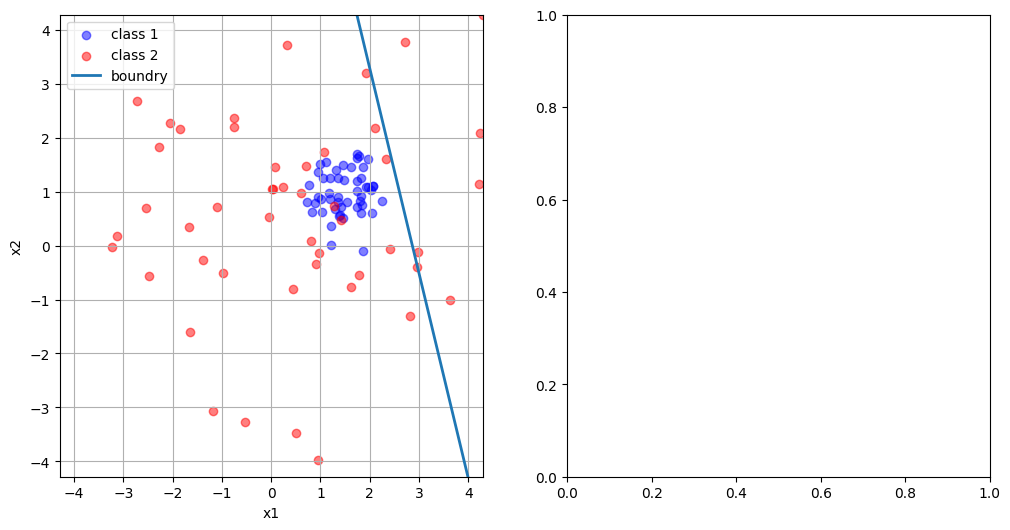

In [291]:
test_data = np.genfromtxt("dataset3_test.csv",
                    delimiter=",", dtype=float)
x = test_data[1:,0:2]
labels = test_data[1:,2]
print("--------------start testing----------------------")
#print(x, labels, w_hats[-1])
error_rate = perceptron_testing(x, labels, w_hats[-1])
plot_linear_testing(x, labels, w_hats[-1])
plt.show()

In [292]:
w_hats[-1]

array([ 82.        , -28.61804405,  -7.51658683])

In [293]:
import numpy as np

def perceptron_learning10(x, labels, w_int=np.array([1.0, 1.0, 1.0]), eta=10, max_iterations=1000):

    """
    Implements the batch gd perceptron learning algorithm.

    Args:
        x: (N, D) data array, non-augmented format.
        labels: Array of length N with labels 1, 2.
        w_int: Initial weights as a numpy array. Defaults to numpy.array([1.0,1.0,1.0]).
        eta: Learning rate as a float. Defaults to 1.
        max_iterations: Maximum number of iterations as an int. 
                        Defaults to 1000(here refer to epochs for batch gd).

    Returns:
        w_hats: Weights after each iteration.
                The array size should be (epochs, D+1) when augmented
        Js: Criterion function values after each iteration, size: (epochs, )
        error_rates: Misclassification rates after each iteration, size: (epochs, )
    """

    ########################
    # your code comes here
    ########################

    # Normalize labels to -1 and 1
    labels = np.where(labels == 1, -1, 1)
    
    # Initialize weights
    w = w_int.copy()
    
    # Initialize history of weights, criterion values, and error rates
    w_hats = [w.copy()]
    Js = []
    error_rates = []
    
    # Augment input data
    x_new = np.hstack((np.ones((x.shape[0], 1)), x))
    
    for i in range(max_iterations):
        output = np.dot(x_new, w)
        pred = np.sign(output)
        misclassified_points = (pred != labels)
        
        # Calculate error rate
        error_rate = np.mean(misclassified_points)
        error_rates.append(error_rate)
        
        # Calculate criterion function value using a formula taught in class
        J = -np.sum(output[misclassified_points] * labels[misclassified_points])

        Js.append(J)
        
        # Update weights using batch gradient descent
        if not np.any(misclassified_points):
            print(f"Convergence reached at epoch: { i + 1}")
            halt_condition = "Convergence"
            break
        
        gradient = - np.dot(x_new.T, labels * misclassified_points)
        w = w - eta * gradient
        w_hats.append(w.copy())
    else:
        halt_condition = "Maximum iterations reached without convergence."
        print(halt_condition)
        
    accuracy = 1 - error_rates[-1] 
    # Classification accuracy on the train set
    print("Classification accuracy on the train set = " , accuracy*100)
    print("Which halting condition was met = " , halt_condition)
    print("The weight values after halting = " , w)
    print("How many iterations were performed = ", i+1)
    
    return np.array(w_hats), np.array(Js), np.array(error_rates)



Convergence reached at epoch: 2
Classification accuracy on the train set =  100.0
Which halting condition was met =  Convergence
The weight values after halting =  [  -69.          -937.02486112 -1006.39918235]
How many iterations were performed =  2


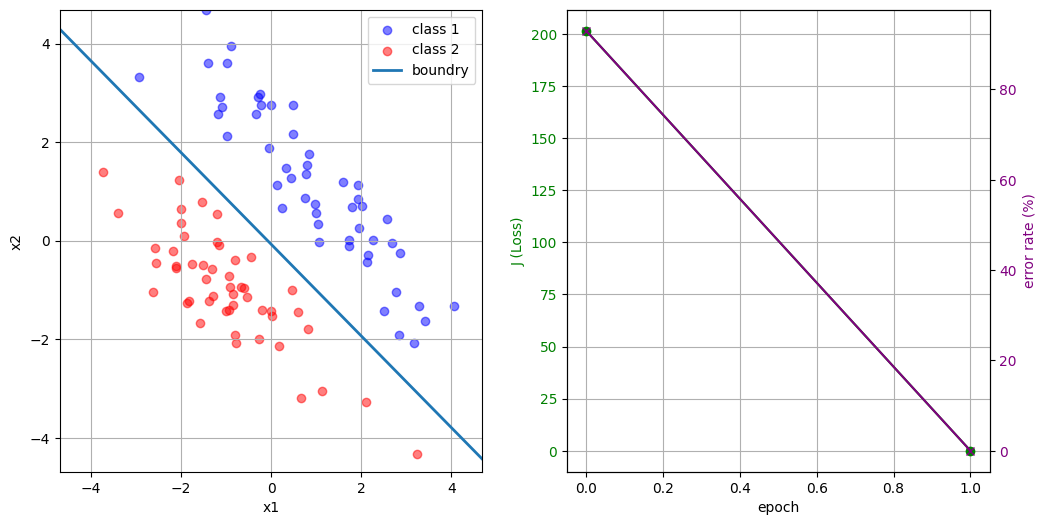

In [294]:
data = np.genfromtxt("dataset1_train.csv",
                    delimiter=",", dtype=float)
x = data[1:,0:2]
labels = data[1:,2]
# print("--------------start training----------------------")
w_hats, Js, error_rates = perceptron_learning10(x, labels)
plot_linear_learning(x, labels, w_hats[-1], Js, error_rates)

--------------start testing----------------------
Classification Accuracy :  100.0
Error rate on testiong dataset :  0.0


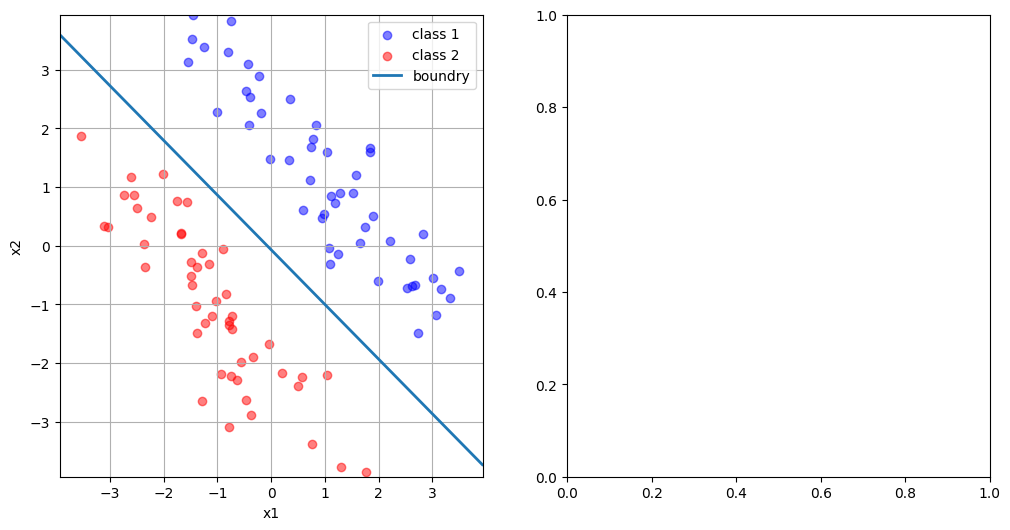

In [295]:
test_data = np.genfromtxt("dataset1_test.csv",
                    delimiter=",", dtype=float)
x = test_data[1:,0:2]
labels = test_data[1:,2]
print("--------------start testing----------------------")
#print(x, labels, w_hats[-1])
error_rate = perceptron_testing(x, labels, w_hats[-1])
plot_linear_testing(x, labels, w_hats[-1])
plt.show()

Convergence reached at epoch: 91
Classification accuracy on the train set =  100.0
Which halting condition was met =  Convergence
The weight values after halting =  [  131.            50.27689559 -2401.79487525]
How many iterations were performed =  91


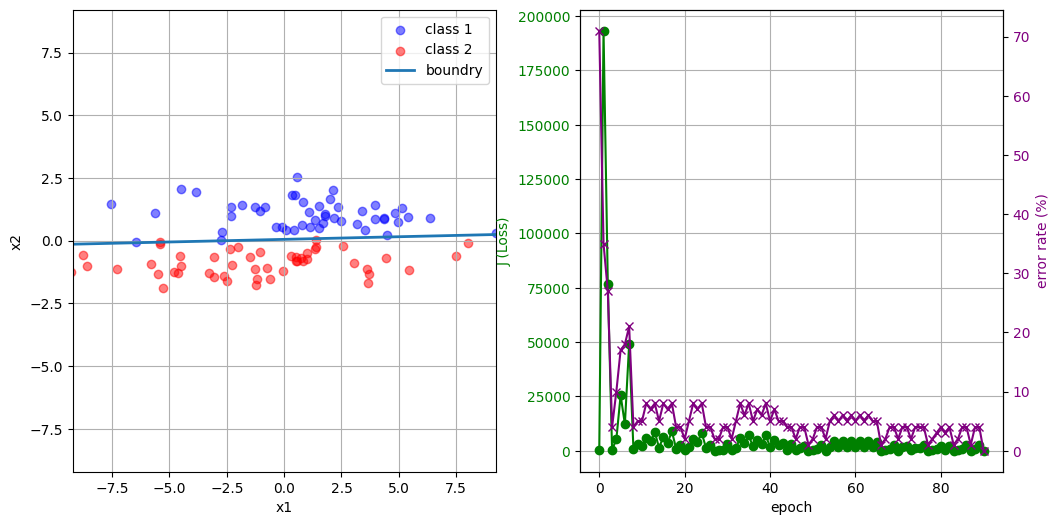

In [296]:
data = np.genfromtxt("dataset2_train.csv",
                    delimiter=",", dtype=float)
x = data[1:,0:2]
labels = data[1:,2]
# print("--------------start training----------------------")
w_hats, Js, error_rates = perceptron_learning10(x, labels)
plot_linear_learning(x, labels, w_hats[-1], Js, error_rates)

--------------start testing----------------------
Classification Accuracy :  96.0
Error rate on testiong dataset :  4.0


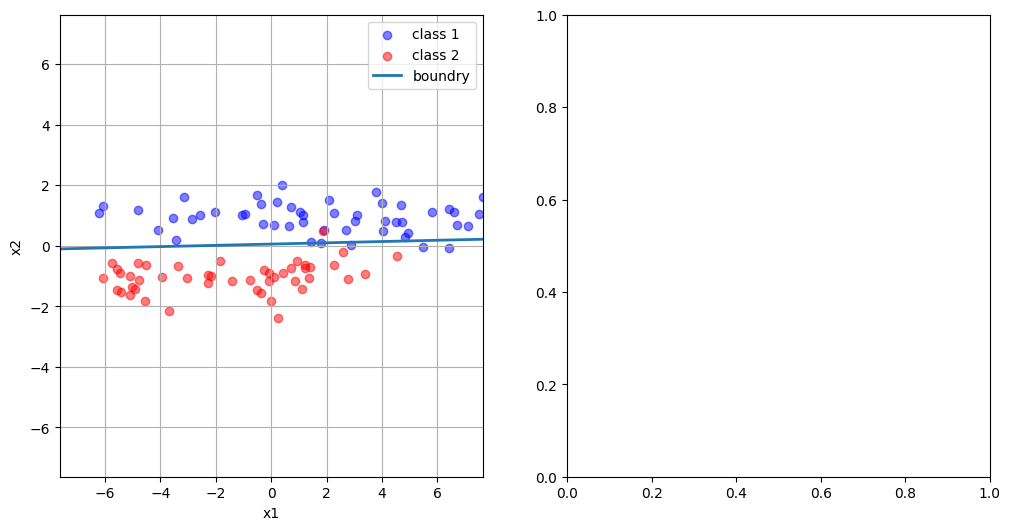

In [297]:
test_data = np.genfromtxt("dataset2_test.csv",
                    delimiter=",", dtype=float)
x = test_data[1:,0:2]
labels = test_data[1:,2]
print("--------------start testing----------------------")
#print(x, labels, w_hats[-1])
error_rate = perceptron_testing(x, labels, w_hats[-1])
plot_linear_testing(x, labels, w_hats[-1])
plt.show()

Maximum iterations reached without convergence.
Classification accuracy on the train set =  77.0
Which halting condition was met =  Maximum iterations reached without convergence.
The weight values after halting =  [ 841.         -268.9341182   -76.82444668]
How many iterations were performed =  1000


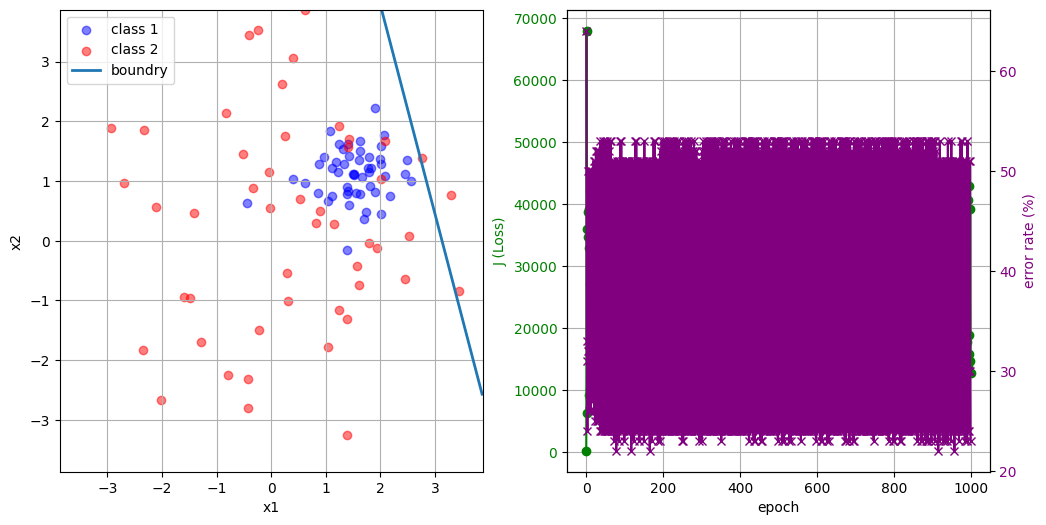

In [298]:
data = np.genfromtxt("dataset3_train.csv",
                    delimiter=",", dtype=float)
x = data[1:,0:2]
labels = data[1:,2]
# print("--------------start training----------------------")
w_hats, Js, error_rates = perceptron_learning10(x, labels)
plot_linear_learning(x, labels, w_hats[-1], Js, error_rates)

--------------start testing----------------------
Classification Accuracy :  44.99999999999999
Error rate on testiong dataset :  55.00000000000001


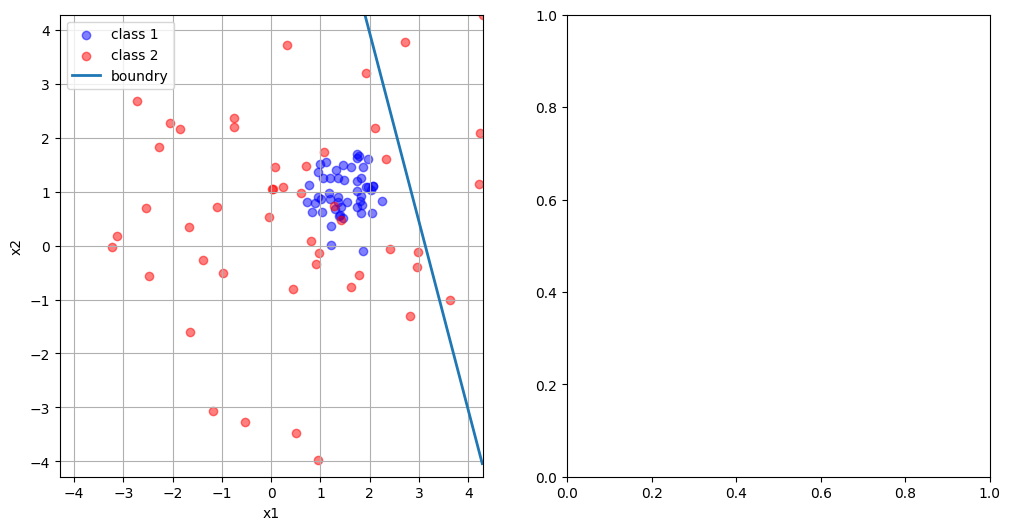

In [299]:
test_data = np.genfromtxt("dataset3_test.csv",
                    delimiter=",", dtype=float)
x = test_data[1:,0:2]
labels = test_data[1:,2]
print("--------------start testing----------------------")
#print(x, labels, w_hats[-1])
error_rate = perceptron_testing(x, labels, w_hats[-1])
plot_linear_testing(x, labels, w_hats[-1])
plt.show()